In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# Although a normal distribution is assumed for testing purposes,
# the sample distribution obtained from the observations is actually loaded.
original_data = np.random.normal(loc=10, scale=2, size=10000)

In [3]:
# Bootstrap Parameters
n_iterations = 1000
sample_sizes = np.arange(1, 501)  # Increasing size in stages
bootstrap_means = []

In [4]:
# Compute bootstrap averages for each sample size
for size in sample_sizes:
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(original_data, size=size, replace=True)
        means.append(np.mean(sample))
    bootstrap_means.append(np.mean(means))

In [5]:
# True mean
true_mean = np.mean(original_data)

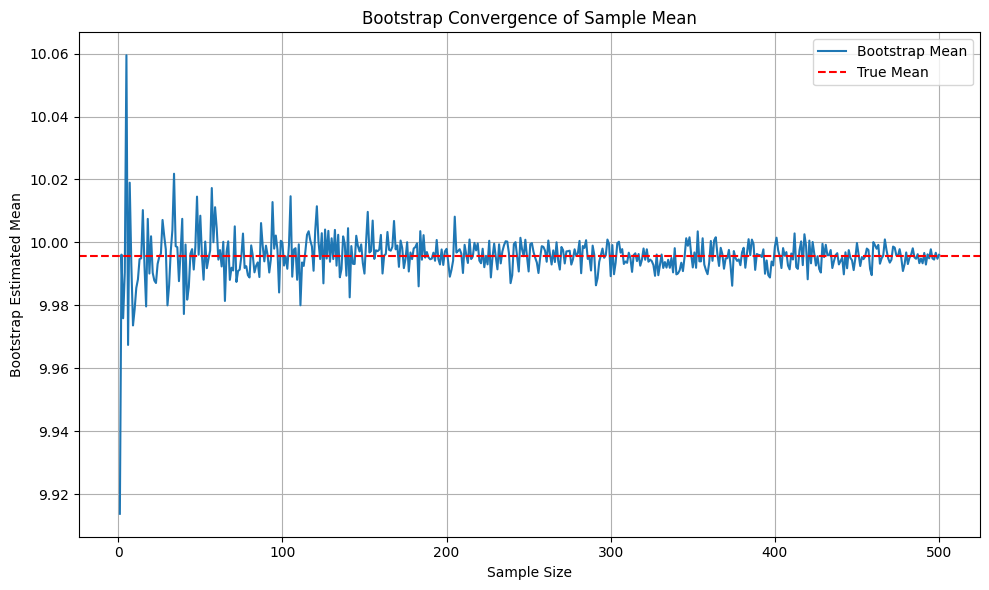

In [6]:
# If the bootstrap averages converge qualitatively, the sample size is sufficient
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, bootstrap_means, label='Bootstrap Mean')
plt.axhline(y=true_mean, color='red', linestyle='--', label='True Mean')
plt.xlabel('Sample Size')
plt.ylabel('Bootstrap Estimated Mean')
plt.title('Bootstrap Convergence of Sample Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
def tost_bootstrap(x, y, low_eqbound, high_eqbound, n_bootstrap=10000, delta=0.05):
    observed_diff = np.mean(x) - np.mean(y)

    boot_diffs = []
    for _ in range(n_bootstrap):
        x_sample = np.random.choice(x, size=len(x), replace=True)
        y_sample = np.random.choice(y, size=len(y), replace=True)
        boot_diffs.append(np.mean(x_sample) - np.mean(y_sample))

    boot_diffs = np.array(boot_diffs)

    # TOST (Two One-Sided Tests)
    p_low = np.mean(boot_diffs < low_eqbound)
    p_high = np.mean(boot_diffs > high_eqbound)

    tost_passed = (p_low < delta) and (p_high < delta)

    result = {
        "observed_difference": observed_diff,
        "p_value_low": p_low,
        "p_value_high": p_high,
        "tost_passed": tost_passed,
        "equivalence_bounds": (low_eqbound, high_eqbound)
    }

    return result

In [8]:
# Although a normal distribution is assumed for testing purposes,
# the sample distribution obtained from the observations is actually loaded.
group1 = original_data
group2 = np.random.normal(loc=10.1, scale=2, size=10000)

In [9]:
result = tost_bootstrap(group1, group2, low_eqbound=-0.15, high_eqbound=0.15)

for key, value in result.items():
    print(f"{key}: {value}")

observed_difference: -0.11475597275479821
p_value_low: 0.1092
p_value_high: 0.0
tost_passed: False
equivalence_bounds: (-0.15, 0.15)
